# cesium - library for time-series feature engineereing
# including
# Lomb-Scargle (detecting and characterizing periodic signals in unevenly-sampled data)

The cesium library includes many functions for time-series data including Lomb-Scargle.

**I am not able to figure out how to run Lomg-Scargle using cesium**

In [61]:
# cesium
# play with cesium a bit
# following:
# http://cesium-ml.org/docs/auto_examples/plot_EEG_Example.html#sphx-glr-auto-examples-plot-eeg-example-py 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

In [63]:
eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


In [64]:
# figure out the structure...
print(type(eeg))
print(len(eeg))
for key, value in eeg.items():
        print(key)

print('---------header')
print(type(eeg['header']))
print(eeg['header'])
print('---------archive')
print(type(eeg['archive']))
print(eeg['archive'])

print()
print('---------times')
print(type(eeg['times']))
print(len(eeg['times']))
print('---------times[0]')
print(type(eeg['times'][0]))
print(len(eeg['times'][0]))
print('---------times[0][0]')
print(type(eeg['times'][0][0]))

print()
print('---------measurements')
print(type(eeg['measurements']))
print(len(eeg['measurements']))
print('---------measurements[0]')
print(type(eeg['measurements'][0]))
print(len(eeg['measurements'][0]))
print('---------measurements[0][0]')
print(type(eeg['measurements'][0][0]))

print()
print('---------classes')
print(type(eeg['classes']))
print(len(eeg['classes']))
print('---------classes[0]')
print(type(eeg['classes'][0]))
print(len(eeg['classes'][0]))
print(eeg['classes'])


<class 'dict'>
5
times
measurements
classes
archive
header
---------header
<class 'str'>
C:\Users\Chris/.local/datasets/andrzejak\andrzejak.csv
---------archive
<class 'str'>
C:\Users\Chris/.local/datasets/andrzejak\andrzejak.tar.gz

---------times
<class 'list'>
500
---------times[0]
<class 'numpy.ndarray'>
4097
---------times[0][0]
<class 'numpy.float64'>

---------measurements
<class 'list'>
500
---------measurements[0]
<class 'numpy.ndarray'>
4097
---------measurements[0][0]
<class 'numpy.float64'>

---------classes
<class 'numpy.ndarray'>
500
---------classes[0]
<class 'numpy.str_'>
1
['Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z'
 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z'
 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z'
 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z'
 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z'
 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' '

* so in summary, the data is presented as two 2d arrays 500x4096 of float 64. 
* The first array is timestamps, the second array is measurements.
* The 'class' appears to be string - a 1d array of 500
* so...
  * 500 appears to be the subject on which the readings were taken
  * 4096 appears to be the number of readings taken
* I guess by defining it this way it forces the number of readings to be exactly 4096
* whatever!

In [65]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
# it looks like this is done in place
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

print(eeg['classes'])

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

Ictal
400
Interictal
200
Normal
0
Ictal
401
Interictal
201
Normal
1


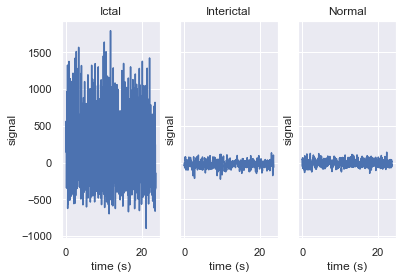

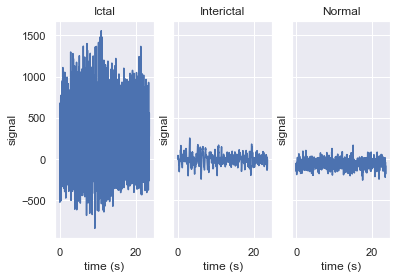

In [66]:
# ok this is pretty slick
#   for each of the three classes
#     find the first subject of that class
#     plot measurement vs times for that subject
fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    print(label)
    print(i)
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

# now do it again - this time for the second subject
fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][1]
    print(label)
    print(i)
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

# Featurization

In [67]:
import dask
import dask.threaded
from dask import delayed
from dask.local import reraise
from dask.threaded import pack_exception
from sklearn.preprocessing import Imputer


In [57]:
# so far cesium hasn't done anything...
# now "comes "Featurization"
from cesium import featurize
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]
fset_cesium = featurize.featurize_time_series(times=eeg["times"],
                                              values=eeg["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use)
print(fset_cesium.head())

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_1

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_1

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_1

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
c:\users\chris\documents\code_kaggle_plasticc_1

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
c:\users\chris\documents\code_kaggle_plasticc_190915\kagg

c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\cesium\features\cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
c:\users\chris\documents\code_kaggle_plasticc_190915\kaggle_plasticc\project\pymote_env\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


feature amplitude percent_beyond_1_std maximum     max_slope median  \
channel         0                    0       0             0      0   
0           143.5             0.327313   141.0  11107.796610   -4.0   
1           211.5             0.290212   169.0  20653.559322  -51.0   
2           165.0             0.302660   184.0  13537.627119   13.0   
3           171.5             0.300952   162.0  17008.813559   -4.0   
4           170.0             0.305101   152.0  13016.949153  -18.0   

feature median_absolute_deviation percent_close_to_median minimum      skew  \
channel                         0                       0       0         0   
0                            28.0                0.505004  -146.0  0.032805   
1                            32.0                0.640469  -254.0 -0.092715   
2                            31.0                0.515987  -146.0 -0.004100   
3                            31.0                0.541128  -181.0  0.063678   
4                           

# Multi-channel time series

In [ ]:
# Lomb-Scargle (Periodic)

```
Lomb-Scargle (Periodic)	Description
fold2P_slope_10percentile	Get alphath percentile of slopes of period-folded model.
fold2P_slope_90percentile	Get alphath percentile of slopes of period-folded model.

freq1_amplitude1	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_amplitude2	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_amplitude3	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_amplitude4	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_freq	Get the ith frequency from a fitted Lomb-Scargle model.
freq1_lambda	Get the regularization parameter of a fitted Lomb-Scargle model.
freq1_rel_phase2	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_rel_phase3	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_rel_phase4	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq1_signif	Get the significance (in sigmas) of the first frequency from a fitted Lomb-Scargle model.

freq2_amplitude1	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_amplitude2	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_amplitude3	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_amplitude4	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_freq	Get the ith frequency from a fitted Lomb-Scargle model.
freq2_rel_phase2	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_rel_phase3	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq2_rel_phase4	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.

freq3_amplitude1	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_amplitude2	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_amplitude3	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_amplitude4	Get the amplitude of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_freq	Get the ith frequency from a fitted Lomb-Scargle model.
freq3_rel_phase2	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_rel_phase3	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.
freq3_rel_phase4	Get the relative phase of the jth harmonic of the ith frequency from a fitted Lomb-Scargle model.

freq_amplitude_ratio_21	Get the ratio of the amplitudes of the first harmonic for the ith and first frequencies from a fitted Lomb-Scargle model.
freq_amplitude_ratio_31	Get the ratio of the amplitudes of the first harmonic for the ith and first frequencies from a fitted Lomb-Scargle model.
freq_frequency_ratio_21	Get the ratio of the ith and first frequencies from a fitted Lomb-Scargle model.
freq_frequency_ratio_31	Get the ratio of the ith and first frequencies from a fitted Lomb-Scargle model.
freq_model_max_delta_mags	Largest value minus second largest value of fitted Lomb Scargle model.
freq_model_min_delta_mags	Second smallest value minus smallest value of fitted Lomb Scargle model.
freq_model_phi1_phi2	Ratio of distances between the second minimum and first maximum, and the second minimum and second maximum, of the fitted Lomb-Scargle model.
freq_n_alias	Here we check for “1-day” aliases in ASAS / Deboss sources.
freq_signif_ratio_21	Get the ratio of the significances (in sigmas) of the ith and first frequencies from a fitted Lomb-Scargle model.
freq_signif_ratio_31	Get the ratio of the significances (in sigmas) of the ith and first frequencies from a fitted Lomb-Scargle model.
freq_varrat	Get the fraction of the variance explained by the first frequency of a fitted Lomb-Scargle model.
freq_y_offset	Get the y-intercept of a fitted Lomb-Scargle model.
linear_trend	Get the linear trend of a fitted Lomb-Scargle model.
medperc90_2p_p	Get ratio of 90th percentiles of residuals for data folded by twice the estimated period and the estimated period, respectively.
p2p_scatter_2praw	Get ratio of variability (sum of squared differences of consecutive values) of folded and unfolded models.
p2p_scatter_over_mad	Get ratio of variability of folded and unfolded models.
p2p_scatter_pfold_over_mad	Get ratio of median of period-folded data over median absolute deviation of observed values.
p2p_ssqr_diff_over_var	Get sum of squared differences of consecutive values as a fraction of the variance of the data.
scatter_res_raw	From arXiv 1101_2406v1 Dubath 20110112 paper.
```
